# 2019 POLEVAL TASK 6.2
**Data preprocessing**


---





http://2019.poleval.pl/index.php/tasks/task6


## To install and download

In [27]:
!pip install argparse -q    #Argparse 3.2
!pip install xtract -q    #Xtract 0.1 a3
!pip install wget -q    #Wget 3.2
!pip install -U -q PyDrive
!python -m pip install spacy==2.3.2 -q
# always restart session after spacy installation
!python -m spacy download pl_core_news_md  -q
!python -m spacy download pl_core_news_lg -q #

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.9 MB 29.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.1 MB 50.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 79.9 MB 1.2 MB/s 
‚úî Download and installation successful
You can now load the model via spacy.load('pl_core_news_md')
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 604.2 MB 1.3 MB/s 
‚úî Download and installation successful
You can now load the model via spacy.load('pl_core_news_lg')


In [1]:
# install and download 
from IPython.display import clear_output
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import re
import numpy as np
import string
import time

# wizualizacja
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
# nltk - do preprocessingu
import nltk
from nltk.stem import WordNetLemmatizer
import spacy

## Download train and test data from Google Drive


In [2]:
#Authenticate
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#train data
path1 = '/content/drive/MyDrive/POLEVAL_6.2/training_set_clean_only_text.txt' 
path2 = '/content/drive/MyDrive/POLEVAL_6.2/training_set_clean_only_tags.txt'  
df1 = pd.read_csv(path1, delimiter = "\t", header = None)
df1.columns = ['tweets_txt']
df2 = pd.read_csv(path2, delimiter = "\t", header = None)
df2.columns = ['tag']
train_data = pd.concat([df1.reset_index(drop=True), df2], axis=1,)
train_data.head(10)

tweets_txt  tag
0  Dla mnie faworytem do tytu≈Çu bƒôdzie Cracovia. ...    0
1  @anonymized_account @anonymized_account Brawo ...    0
2  @anonymized_account @anonymized_account Super,...    0
3  @anonymized_account @anonymized_account Musi. ...    0
4    Odrzut natychmiastowy, kwa≈õna mina, mam problem    0
5  Jaki on by≈Ç fajny xdd pamiƒôtam, ≈ºe sp√≥≈∫ni≈Çam s...    0
6    @anonymized_account No nie ma u nas szczƒô≈õcia üòâ    0
7  @anonymized_account Dawno kogo≈õ tak wrednego n...    0
8  @anonymized_account @anonymized_account Zaleg≈Ç...    0
9  @anonymized_account @anonymized_account @anony...    2

In [4]:
#test data
path1 = '/content/drive/MyDrive/POLEVAL_6.1/test_set_clean_only_text.txt' 
path2 = '/content/drive/MyDrive/POLEVAL_6.1/test_set_clean_only_tags.txt'  
df1 = pd.read_csv(path1, delimiter = "\t", header = None)
df1.columns = ['tweets_txt']
df2 = pd.read_csv(path2, delimiter = "\t", header = None)
df2.columns = ['tag']
test_data = pd.concat([df1.reset_index(drop=True), df2], axis=1,)
test_data.head(10)

tweets_txt  tag
0  @anonymized_account Spoko, jak im Duda z Moraw...    0
1  @anonymized_account @anonymized_account Ale on...    0
2  @anonymized_account No czy Prezes nie mia≈Ç rac...    0
3  @anonymized_account @anonymized_account Przeci...    0
4  @anonymized_account @anonymized_account Owszem...    0
5  @anonymized_account @anonymized_account skƒÖd w...    0
6  Z tego, co widzƒô, to kibice Widzewa majƒÖ szczƒô...    0
7  @anonymized_account @anonymized_account @anony...    0
8  Przypomnijcie mi ze muszƒô jeszcze suszarkƒô spa...    0
9  Czy Adam ju≈º nie ≈ºyje? Je≈õli tak, to jak rozwi...    0

In [5]:
#map tags values 
di = {0:'Neutral', 1:'Cyberbullying', 2: "Hate-speech"}
test_data["tag_val"] = test_data["tag"].map(di)
train_data["tag_val"] = train_data["tag"].map(di)

## Data exploration

In [6]:
# join train and test data together
df = train_data.append(test_data, ignore_index=True)

In [7]:
n = len(df)
print(f'number of train_comments: {len(train_data)} ({round(len(train_data)/n *100, 2)}%).')
print(f'number of test_comments: {len(test_data)} ({round(len(test_data)/n *100, 2)}%).')
print(f'total: {n}')

number of train_comments: 10041 (90.94%).
number of test_comments: 1000 (9.06%).
total: 11041


In [8]:
# dystrybucja 
df.groupby('tag_val').nunique()

tweets_txt  tag
tag_val                       
Cyberbullying         387    1
Hate-speech           597    1
Neutral             10043    1

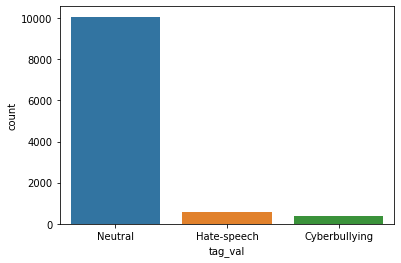

In [9]:
sns.countplot(x='tag_val', data=df)

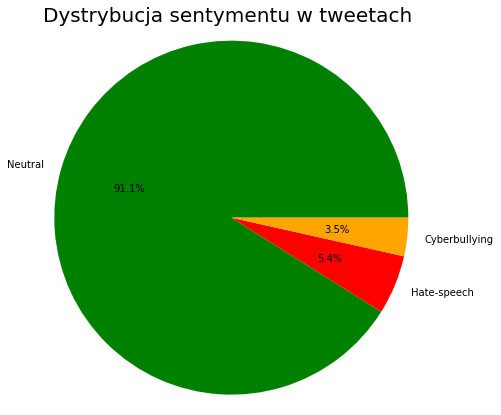

index  tag_val
0        Neutral    10056
1    Hate-speech      598
2  Cyberbullying      387

In [10]:
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["green","red", "orange"]
df_pie=df["tag_val"].value_counts().reset_index()
plt.pie(df_pie["tag_val"], labels = df_pie["index"], radius=2, colors=colors, autopct="%1.1f%%")
plt.axis('equal')
plt.title("Dystrybucja sentymentu w tweetach ", fontsize=20)
plt.show()
df_pie

In [11]:
from collections import Counter
def get_most_common(txt, top=20):
  words = (txt).split()
  print(f'Found {len(words)} words.')
  most_common = Counter(words).most_common(top)
  labels = []
  values = []
  for label, val in most_common:
    labels.append(label)
    values.append(val)
  return values, labels

def plot_most_common(txt_comments, top=20, title=''):
  values, labels = get_most_common(txt_comments, top)
  x = range(len(values))

  plt.figure(figsize=(15, 5))
  plt.bar(x, values)
  plt.xticks(x, labels, rotation=90)
  plt.title(title)
  plt.show()

Found 71977 words.


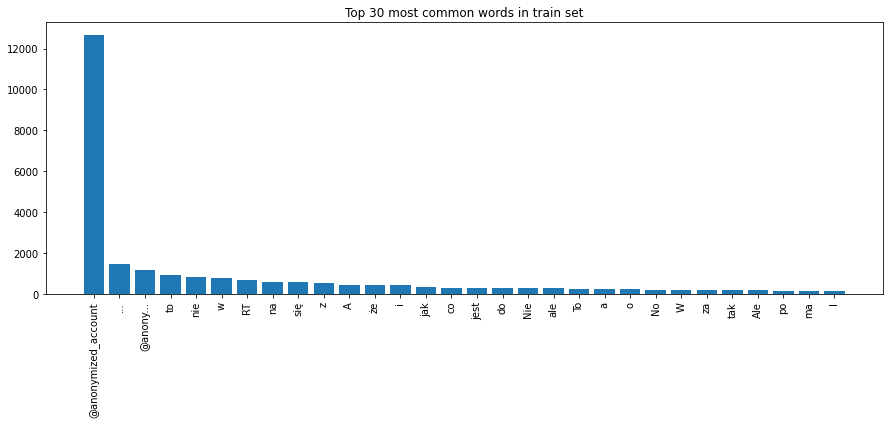

In [12]:
tweets = df['tweets_txt'].to_string()
plot_most_common(tweets, top=30, title='Top 30 most common words in train set')

## Data preprocessing


### Drop duplicate values and normalize


In [13]:
# drop duplicate values
df['tweets_txt'].drop_duplicates(keep="first", inplace=True)

### Normalization make all strings lowercase
df['tweets_txt']= df['tweets_txt'].str.lower() 
df.head()

tweets_txt  tag  tag_val
0  dla mnie faworytem do tytu≈Çu bƒôdzie cracovia. ...    0  Neutral
1  @anonymized_account @anonymized_account brawo ...    0  Neutral
2  @anonymized_account @anonymized_account super,...    0  Neutral
3  @anonymized_account @anonymized_account musi. ...    0  Neutral
4    odrzut natychmiastowy, kwa≈õna mina, mam problem    0  Neutral

### Stopwords


In [14]:
import spacy
nlp = spacy.load('pl_core_news_md')

In [15]:
lemma = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
stopwordlist = nlp.Defaults.stop_words
print(stopwordlist)

{'byla', 'je≈õli', '≈ºadna', 'pan', 'jak', 'bedzie', 'mozliwe', 'oto', 'lecz', 'mu', 'dokad', 'mogƒÖ', 'takie', 'twoi', 'bo', 'ktos', 'podczas', '≈ºadnych', 'vi', 'dlatego', 'kto', 'byly', 'swoje', 'gdy≈º', 'tobie', 'ja', 'by≈Ço', 'mamy', 'trzeba', 'wszystko', 'bowiem', 'cali', 'skƒÖd', 'zadnych', 'juz', 'nich', 'natychmiast', 'jeden', 'jednakze', 'musi', 'byl', 'pomimo', 'tej', 'ktokolwiek', 'go', 'jakas', 'mo≈ºliwe', 'nasza', 'tego', 'tote≈º', 'mnƒÖ', 'wiele', 'by≈Ça', 'jedno', 'powinien', 'natomiast', 'przez', 'was', 'mia≈Ç', 'w≈Ça≈õnie', 'moi', 'bƒôdƒÖ', 'no', 'mam', 'dzi≈õ', 'tw√≥j', 'jesli', 'zn√≥w', 'obok', 'zosta≈Ç', 'ku', 'ma≈Ço', 'jako≈õ', 'jaki', 'choƒá', 'nie', 'ciƒô', 'wiƒôc', 'spos√≥b', 'alez', 'te', 'powinna', 'mna', '≈ºe', 'nasz', 'taka', 'mo≈ºna', 'mo≈ºe', 'wie', 'jednak≈ºe', 'moze', 'kt√≥ra', 'kim≈õ', 'ile', 'jedna', 'tutaj', 'jakich≈õ', 'ze', 'xiii', 'zawsze', 'jego', 'wtedy', 'jedynie', 'moja', 'sobƒÖ', 'i≈º', 'powinni', 'nia', 'wed≈Çug', 'gdy', 'w≈õr√≥d', 'bylo', '

In [17]:
def clean_text(text):
  text = text.replace("@anonymized_account", ' ')
  text = text.replace("rt", ' ')
  text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text) # URL 
  text = re.sub('\$[a-zA-Z0-9]*', ' ', text)
  text = re.sub('\@[a-zA-Z0-9]*', ' ', text)
  text = re.sub('[0-9]+', '', text)  # deleting numbers
  text = re.sub(r'(.)1+', r'1', text) # repeating chars
  text = re.sub(r'[^\w\s]','',text) #remove everything except words and space
  text = re.sub(r'_','', text)
  text = re.sub('\t', '', text)
  text = ' '.join( [w for w in text.split() if len(w)>1] )
  text = ' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(text) if x not in stopwordlist])
  text = [lemma.lemmatize(x,nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(text) if x not in stopwordlist]
  return text

In [18]:
df["clean_tokenized"] = df["tweets_txt"].apply(clean_text)
df['cleaned_text'] = df['clean_tokenized'].apply(lambda x:' '.join(x))

df.head()

tweets_txt  ...                                       cleaned_text
0  dla mnie faworytem do tytu≈Çu bƒôdzie cracovia. ...  ...   faworytem tytu≈Çu cracovia zobaczymy typ sprawdzi
1  @anonymized_account @anonymized_account brawo ...  ...                        brawo daria kibic dobre z≈Çe
2  @anonymized_account @anonymized_account super,...  ...  super polski premier sk≈Çada kwiaty grobach kol...
3  @anonymized_account @anonymized_account musi. ...  ...                                        innej drogi
4    odrzut natychmiastowy, kwa≈õna mina, mam problem  ...          odrzut natychmiastowy kwa≈õna mina problem

[5 rows x 5 columns]

### Lematization

In [19]:
nlp = spacy.load('pl_core_news_lg')
tweets = df["cleaned_text"].to_string()

In [20]:
df["lemmatized"] = df['cleaned_text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))

In [21]:
df.head()

tweets_txt  ...                                         lemmatized
0  dla mnie faworytem do tytu≈Çu bƒôdzie cracovia. ...  ...      faworyt tytu≈Ç cracovia zobaczyƒá typ sprawdziƒá
1  @anonymized_account @anonymized_account brawo ...  ...                        brawo daria kibic dobry z≈Çy
2  @anonymized_account @anonymized_account super,...  ...  super polski premiera sk≈Çadaƒá kwiat gr√≥b kolab...
3  @anonymized_account @anonymized_account musi. ...  ...                                         inny droga
4    odrzut natychmiastowy, kwa≈õna mina, mam problem  ...          odrzut natychmiastowy kwa≈õny mina problem

[5 rows x 6 columns]

## Cleaned data exploration

In [22]:
def wordcloud_plot(text: str, bg='white'):
  wordcloud = WordCloud(min_font_size=5, #4
                        max_words=150, #200
                        background_color=bg,
                        ).generate(text)
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.plot()

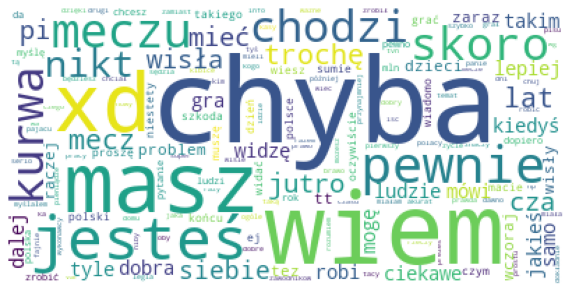

In [23]:
tweets = df['cleaned_text'].to_string()
wordcloud_plot(tweets)

Found 64686 words.


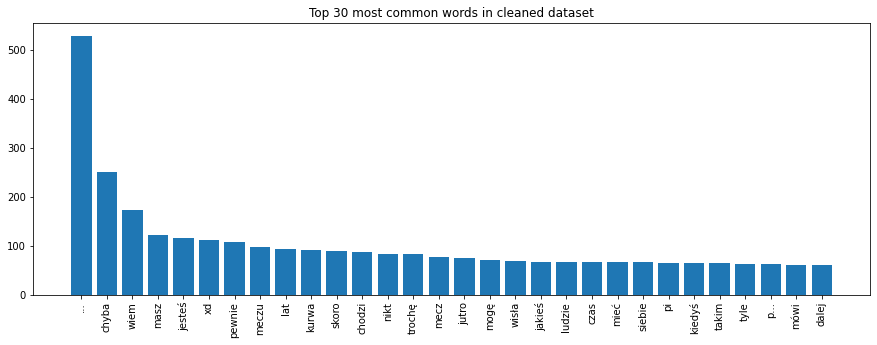

In [24]:
plot_most_common(tweets, top=30, title='Top 30 most common words in cleaned dataset')

## Word distribution in harmful comments

In [27]:
neutral_comments = []
cyberbully_comments = []
hatespeech_comments = []
for comment, label in zip(df['cleaned_text'], df['tag']):
  if label == 0:
    neutral_comments.append(comment)
  elif label == 1:
    cyberbully_comments.append(comment)
  else:
    hatespeech_comments.append(comment)

In [28]:
len(cyberbully_comments)

387

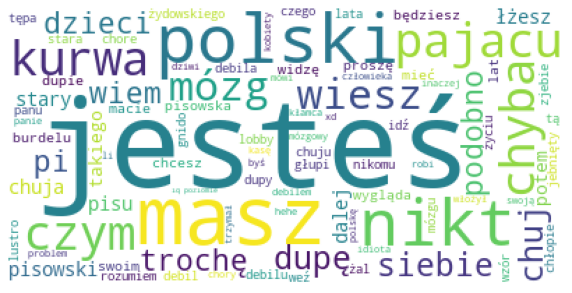

In [32]:
cyberbully_comments = ' '.join(map(str, cyberbully_comments))
wordcloud_plot(cyberbully_comments)

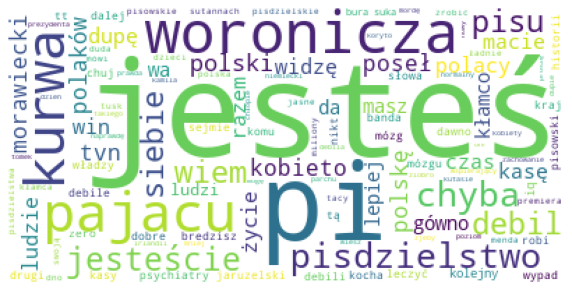

In [33]:
hatespeech_comments = ' '.join(map(str, hatespeech_comments))
wordcloud_plot(hatespeech_comments)

Found 2301 words.


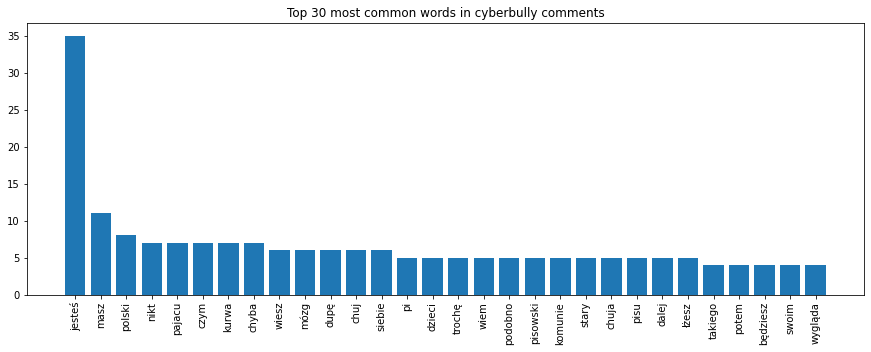

In [34]:
plot_most_common(cyberbully_comments, top=30, title='Top 30 most common words in cyberbully comments')

Found 3904 words.


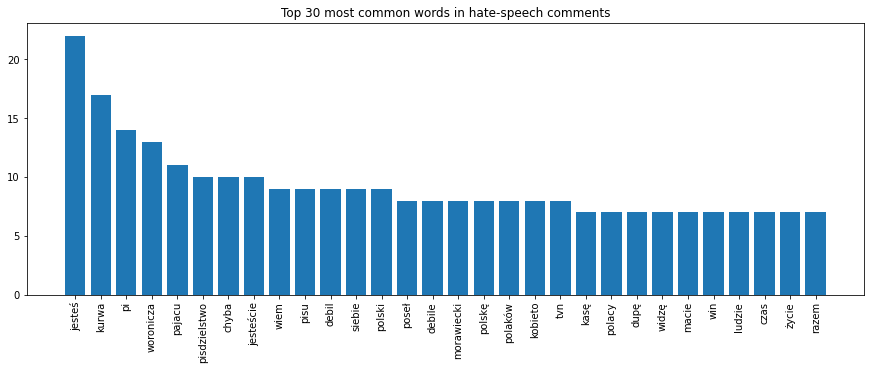

In [35]:
plot_most_common(hatespeech_comments, top=30, title='Top 30 most common words in hate-speech comments')

## Write preprocessed data to Drive

In [36]:
train_data = train_data.astype(str)
train_data['tweets_txt']= train_data['tweets_txt'].str.lower() 

test_data = test_data.astype(str)
test_data['tweets_txt']= test_data['tweets_txt'].str.lower() 

df = df.astype(str)

In [38]:
## left joining df preprocessed data with original train_data
train_data_preprocessed = train_data.merge(df, how='left', on=["tweets_txt", "tag", "tag_val"])
train_data_preprocessed.head()

tweets_txt  ...                                         lemmatized
0  dla mnie faworytem do tytu≈Çu bƒôdzie cracovia. ...  ...      faworyt tytu≈Ç cracovia zobaczyƒá typ sprawdziƒá
1  @anonymized_account @anonymized_account brawo ...  ...                        brawo daria kibic dobry z≈Çy
2  @anonymized_account @anonymized_account super,...  ...  super polski premiera sk≈Çadaƒá kwiat gr√≥b kolab...
3  @anonymized_account @anonymized_account musi. ...  ...                                         inny droga
4    odrzut natychmiastowy, kwa≈õna mina, mam problem  ...          odrzut natychmiastowy kwa≈õny mina problem

[5 rows x 6 columns]

In [39]:
test_data_preprocessed = test_data.merge(df, how='left', on=["tweets_txt", "tag", "tag_val"])
test_data_preprocessed.head() 

tweets_txt  ...                                      lemmatized
0  @anonymized_account spoko, jak im duda z moraw...  ...        spoko duda morawieckim zam√≥wiƒá piƒôƒá piwo
1  @anonymized_account @anonymized_account ale on...  ...         szansa zagranie proba czysty prowizorka
2  @anonymized_account no czy prezes nie mia≈Ç rac...  ...   prezes racja m√≥wiƒÖcze zdradziecki morda racja
3  @anonymized_account @anonymized_account przeci...  ...                                      przewrotka
4  @anonymized_account @anonymized_account owszem...  ...  podatek okoliczno≈õƒá ma≈Çysza odpaliƒá team orlen

[5 rows x 6 columns]

In [40]:
test_data_preprocessed.drop_duplicates(keep="first", inplace=True)
train_data_preprocessed.drop_duplicates(keep="first", inplace=True)

In [41]:
# save preprocessed data 
test_data_preprocessed.to_csv("/content/drive/MyDrive/POLEVAL_6.2/test_data_preprocessed.csv")
train_data_preprocessed.to_csv("/content/drive/MyDrive/POLEVAL_6.2/train_data_preprocessed.csv")